In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import collections
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)

In [8]:
data = pd.read_csv("test_data.csv")

In [9]:
data.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


## 1. Воспроизвести график рекламных событий по дням 

In [4]:
data.sort_values(by = "date", inplace = True)

In [12]:
def get_statistic_plots(data, event):
    if event != "all":
        data = data[data["event"] == event]
    dates = list(set(data["date"].values))
    a = {}
    for date in dates:
        c = data[data["date"] == date].shape[0]
        a[date] = c
    a = collections.OrderedDict(sorted(a.items()))
    plt.plot(list(map(lambda x: x[-2:],list(a.keys()))), a.values())
    #print(list(map(lambda x: x[-2:],list(a.keys()))))

График всех рекламных событий по дням

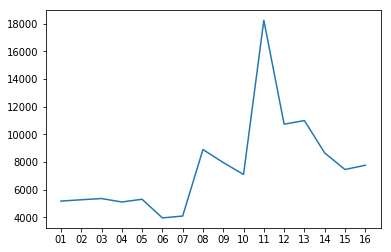

In [6]:
get_statistic_plots(data, "all")

График "кликов" по дням

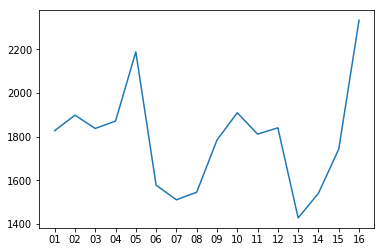

In [7]:
get_statistic_plots(data, "click")

График жалоб по дням

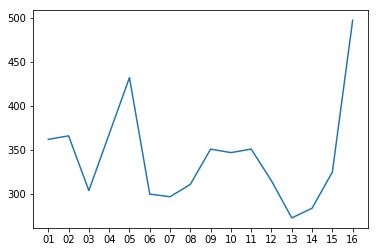

In [8]:
get_statistic_plots(data, "report")

График просмотров по дням

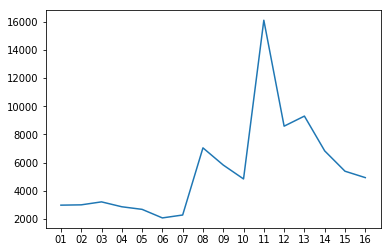

In [9]:
get_statistic_plots(data, "view")

Как видно, основной вклад в общий график рекламных событий вносят просмотры. Пик на 11 число связан с резким их увеличением. 

## 2. Найдем причину резкого их увеличения

In [10]:
data_p = data[(data["date"] == "2019-04-11") & (data["event"] == "view")]

In [11]:
data_p.shape

(16097, 10)

## Описательные статистики

In [12]:
data_p["agency_union_id"].describe()

count        16097
unique          91
top       agency_2
freq         14025
Name: agency_union_id, dtype: object

In [13]:
data_p["platform"].describe()

count       16097
unique          4
top       android
freq        11547
Name: platform, dtype: object

In [14]:
data_p["campaign_union_id"].describe()

count              16097
unique               603
top       campaign_49554
freq               13931
Name: campaign_union_id, dtype: object

In [15]:
data_p["ad_id"].describe()

count        16097
unique         879
top       ad_49554
freq          9631
Name: ad_id, dtype: object

## Рассмотрим активность agency_2 

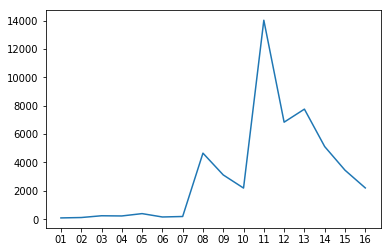

In [16]:
get_statistic_plots(data[data["agency_union_id"] == "agency_2"], "all")

## Рассмотрим активность остальных агенств

In [52]:
def get_agency_stat(data, date, n):
    if date != "all":
        data = data[data["date"] == date]
    agencies = list(set(data["agency_union_id"].values))
    a = {}
    for agency in agencies:
        a[agency] = data[data["agency_union_id"] == agency].shape[0]
    sorted_a = sorted(a.items(), key=lambda kv: kv[1])
    return sorted_a[::-1][:n]

In [18]:
get_agency_stat(data, "all", 10)

[('agency_2', 50796),
 ('no_agency', 47267),
 ('agency_33', 1813),
 ('agency_158', 1712),
 ('agency_543', 1218),
 ('agency_70', 1028),
 ('agency_180', 779),
 ('agency_77', 665),
 ('agency_1589', 646),
 ('agency_11', 641)]

In [53]:
dates = sorted(list(set(data["date"].values)))
for date in dates:
    print(date, get_agency_stat(data, date, 3))
    print()

2019-04-01 [('no_agency', 3339), ('agency_158', 256), ('agency_33', 219)]

2019-04-02 [('no_agency', 3435), ('agency_158', 199), ('agency_33', 190)]

2019-04-03 [('no_agency', 3350), ('agency_2', 240), ('agency_158', 186)]

2019-04-04 [('no_agency', 3316), ('agency_2', 226), ('agency_33', 174)]

2019-04-05 [('no_agency', 3472), ('agency_2', 391), ('agency_543', 118)]

2019-04-06 [('no_agency', 2538), ('agency_2', 154), ('agency_543', 91)]

2019-04-07 [('no_agency', 2571), ('agency_2', 188), ('agency_180', 76)]

2019-04-08 [('agency_2', 4658), ('no_agency', 2898), ('agency_33', 155)]

2019-04-09 [('no_agency', 3220), ('agency_2', 3121), ('agency_33', 195)]

2019-04-10 [('no_agency', 3172), ('agency_2', 2194), ('agency_33', 166)]

2019-04-11 [('agency_2', 14035), ('no_agency', 2691), ('agency_158', 105)]

2019-04-12 [('agency_2', 6843), ('no_agency', 2568), ('agency_34', 95)]

2019-04-13 [('agency_2', 7763), ('no_agency', 2110), ('agency_34', 101)]

2019-04-14 [('agency_2', 5120), ('no_a

Как было замечено ранее, пик связан с увеличением активности agency_2. Активность остальных агенств стабильна. Начиная в 8 числа agency_2 резко увеличила свои просмотры, пик активности приходится на 11 число. 

Как она их увеличила?

## Рассмотрим использование платформ

In [20]:
data_a2 = data[data["agency_union_id"] == "agency_2"]

In [21]:
for date in dates:
    print(date, data_a2[data_a2["date"] == date]["platform"].describe())
    print()

2019-04-01 count          88
unique          4
top       android
freq           49
Name: platform, dtype: object

2019-04-02 count         115
unique          4
top       android
freq           74
Name: platform, dtype: object

2019-04-03 count         240
unique          4
top       android
freq          146
Name: platform, dtype: object

2019-04-04 count         226
unique          4
top       android
freq          144
Name: platform, dtype: object

2019-04-05 count         391
unique          4
top       android
freq          255
Name: platform, dtype: object

2019-04-06 count         154
unique          4
top       android
freq          102
Name: platform, dtype: object

2019-04-07 count         188
unique          4
top       android
freq          119
Name: platform, dtype: object

2019-04-08 count        4658
unique          4
top       android
freq         2823
Name: platform, dtype: object

2019-04-09 count        3121
unique          4
top       android
freq         1981
Name:

Это не связано с изменением платформы

## Рассмотрим поведение компании

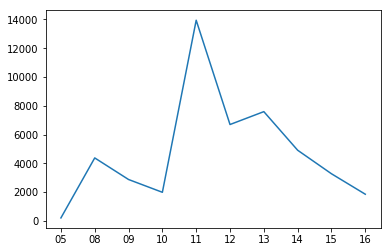

In [22]:
get_statistic_plots(data_a2[data_a2["campaign_union_id"] == "campaign_49554"], "all")

In [23]:
ads = set(data_a2[data_a2["campaign_union_id"] == "campaign_49554"]["ad_id"].values)

In [24]:
for ad in ads:
    print(ad, data_a2[data_a2["ad_id"] == ad].shape[0])

ad_49564 4491
ad_50872 34
ad_49560 7496
ad_49556 8218
ad_49554 27500


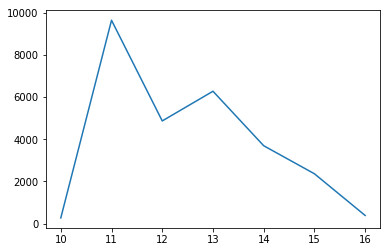

In [25]:
get_statistic_plots(data_a2[data_a2["ad_id"] == "ad_49554"], "all")

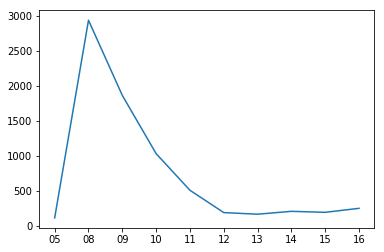

In [26]:
get_statistic_plots(data_a2[data_a2["ad_id"] == "ad_49560"], "all")

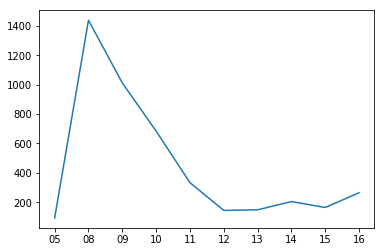

In [27]:
get_statistic_plots(data_a2[data_a2["ad_id"] == "ad_49564"], "all")

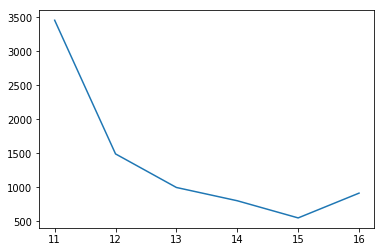

In [28]:
get_statistic_plots(data_a2[data_a2["ad_id"] == "ad_49556"], "all")

Это связано с тем, что  11 числа компания campaign_49554 выпустила объявление ad_49554 и объявление ad_49556. Основной вклад вносит ad_49554. В этом причина резкого увеличения просмотров и рекламных событий в целом. 

## 3. Как детектировать аномальные изменения метрик

Для начала определим как выглядит нормальная рекламная активность. Выбросим пик.

In [10]:
data_cl = data[(data["campaign_union_id"] != "campaign_49554") & (data["ad_id"] != "ad_49554")  & (data["ad_id"] != "ad_49556")]

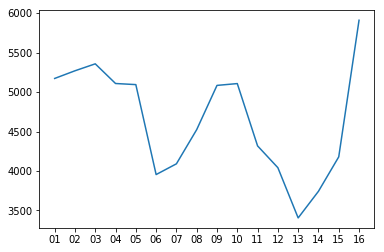

In [13]:
get_statistic_plots(data_cl, "all")

Хоть данных и мало, на графике видна сезонность в неделю. Спады на 6 и 13 апреля, что странно, это субботы. 

Эту сезонность надо учитывать.

## Применим авторегрессию

In [16]:
import statsmodels.api as sm

In [54]:
d = {} #подготовка данных
for date in dates:
    c = data_cl[data_cl["date"] == date].shape[0]
    d[date] = c
d = collections.OrderedDict(sorted(d.items()))

In [33]:
train = pd.DataFrame(pd.Series(d)[:-1])
for_test = pd.DataFrame(pd.Series(d))

In [34]:
train[0]

2019-04-01    5172
2019-04-02    5269
2019-04-03    5357
2019-04-04    5108
2019-04-05    5094
2019-04-06    3955
2019-04-07    4091
2019-04-08    4524
2019-04-09    5084
2019-04-10    5107
2019-04-11    4318
2019-04-12    4042
2019-04-13    3406
2019-04-14    3743
2019-04-15    4179
Name: 0, dtype: int64

In [35]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 3)
# Сгенерируйте различные комбинации p, q и q
pdq = [(1, 1, 1) for x in range(12)]
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(0, 0, 1, x) for x in range(12)]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
#Examples of parameter combinations for Seasonal ARIMA....

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 1) x (0, 0, 1, 1)
SARIMAX: (1, 1, 1) x (0, 0, 1, 2)
SARIMAX: (1, 1, 1) x (0, 0, 1, 3)
SARIMAX: (1, 1, 1) x (0, 0, 1, 4)


In [19]:
import warnings
import itertools
warnings.filterwarnings("ignore") # отключает предупреждения

In [37]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train[0], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}1 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(0, 0, 1, 0)1 - AIC:176.41675011079698
ARIMA(1, 1, 1)x(0, 0, 1, 1)1 - AIC:176.41675011079698
ARIMA(1, 1, 1)x(0, 0, 1, 2)1 - AIC:160.8415405553187
ARIMA(1, 1, 1)x(0, 0, 1, 3)1 - AIC:138.03790854456972
ARIMA(1, 1, 1)x(0, 0, 1, 4)1 - AIC:665.027491741435
ARIMA(1, 1, 1)x(0, 0, 1, 0)1 - AIC:176.41675011079698
ARIMA(1, 1, 1)x(0, 0, 1, 1)1 - AIC:176.41675011079698
ARIMA(1, 1, 1)x(0, 0, 1, 2)1 - AIC:160.8415405553187
ARIMA(1, 1, 1)x(0, 0, 1, 3)1 - AIC:138.03790854456972
ARIMA(1, 1, 1)x(0, 0, 1, 4)1 - AIC:665.027491741435
ARIMA(1, 1, 1)x(0, 0, 1, 0)1 - AIC:176.41675011079698
ARIMA(1, 1, 1)x(0, 0, 1, 1)1 - AIC:176.41675011079698
ARIMA(1, 1, 1)x(0, 0, 1, 2)1 - AIC:160.8415405553187
ARIMA(1, 1, 1)x(0, 0, 1, 3)1 - AIC:138.03790854456972
ARIMA(1, 1, 1)x(0, 0, 1, 4)1 - AIC:665.027491741435
ARIMA(1, 1, 1)x(0, 0, 1, 0)1 - AIC:176.41675011079698
ARIMA(1, 1, 1)x(0, 0, 1, 1)1 - AIC:176.41675011079698
ARIMA(1, 1, 1)x(0, 0, 1, 2)1 - AIC:160.8415405553187
ARIMA(1, 1, 1)x(0, 0, 1, 3)1 - AIC:138

In [38]:
model=sm.tsa.statespace.SARIMAX(train[0], order=(1, 1, 1), seasonal_order=(1, 1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit(disp=-1)

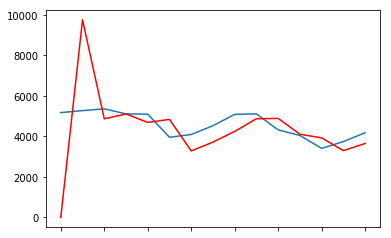

In [39]:
train["model"] = model.fittedvalues
train[0].plot()
train["model"].plot(color='r')
plt.show()

In [40]:
model.predict("2019-04-16")

2019-04-16    3992.444357
Freq: D, dtype: float64

In [41]:
for_test[0][-1]

5909

## Алгоритм

Ошибка достаточно большая, это связано в первую очередь с тем, что данных мало. На практике, если будут предоставлены данные за больший период времени, модель будет точнее.

Алгоритм: Необходимо учитывать сезонность, без этого мы рискуем принять обычное сезоннное увеличение\спад за всплеск\спад активности.

Получая данные за новый день мы сравниваем их с предсказанными значениями модели. Если ошибка на k больше, чем среднее отклонение (если нам нужен только всплеск, а спад не нужен, проверяем это тоже), то мы отсылаем данные аналитику. 

Появляются новые задачи: выбор метрики и определение k.

## Определение k

In [42]:
d_p = {}
for date in dates:
    c = data[data["date"] == date].shape[0]
    d_p[date] = c
d_p = collections.OrderedDict(sorted(d_p.items()))

In [43]:
problem_v = list(d_p.values())

In [44]:
fitted = list(model.fittedvalues)

In [45]:
fitted.append(model.predict("2019-04-16")[0])

In [190]:
fitted;

In [47]:
for i in range(len(fitted)):
    print(abs(problem_v[i] - fitted[i]))

5172.0
4484.278594673844
493.6061739507304
2.9424344354865752
617.1493653014422
881.7584065424298
810.5241771158862
5187.057559712739
3719.0606355930067
2229.1174469214047
13374.666797896323
6635.404559679517
7073.462750610051
5360.4918976540475
3808.8645508857444
3773.555642885597


Что касается метрики, значения ошибки большие, так что будем пока использовать abs(true - predict).

Выберем k = 8000 исходя из наших данных о всплеске. 

## Соберем это все в одну функцию

In [14]:
def is_anomal(data_new, data_cl, k):
    dates = sorted(list(set(data_cl["date"].values)))
    d = {}
    for date in dates:
        c = data_cl[data_cl["date"] == date].shape[0]
        d[date] = c
    d = collections.OrderedDict(sorted(d.items()))
    train = pd.DataFrame(pd.Series(d))
    model = sm.tsa.statespace.SARIMAX(train[0], order=(1, 1, 1), seasonal_order=(1, 1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit(disp=-1)
    pred = model.predict(data_new[0])[0]
    if data_new[1] - pred > k:
        print("Всплеск активности!!!")

## Пример

In [20]:
is_anomal(["2019-04-11",18259], data_cl, 8000)

Всплеск активности!!!


In [23]:
is_anomal(["2019-04-10",7098], data_cl, 8000)

In [24]:
is_anomal(["2019-04-12",10740], data_cl, 8000)

Для простоты новые данные подаются в виде списка, где первый элемент - дата, а второй - значение. Вторым аргументом подается набор данных о нормальном поведении активности. 

Для того, чтобы модель стала применима для прикладных задач, после того, как ей дадут данные за новое число, необходимо сделать следующее: если данные не аномальны, добавить их к набору data_cl. Если данные аномальны, добавить к data_cl предсказанное значение модели.

Алгоритм может работать не толко по дням, но и по любому временному промежутку. Единственный момент - настройка модели ARIMA на нужную сезонность. Для этого нужно снова проводить сеточный поиск необходимых параметров. 

## Поиск аномалий в данных

In [25]:
def find_anomal(data, data_cl, k):
    dates = sorted(list(set(data_cl["date"].values)))
    d = {}
    d_p = {}
    for date in dates:
        c = data_cl[data_cl["date"] == date].shape[0]
        d[date] = c
        c1 = data[data["date"] == date].shape[0]
        d_p[date] = c1
    d = collections.OrderedDict(sorted(d.items()))
    d_p = collections.OrderedDict(sorted(d_p.items()))
    train = pd.DataFrame(pd.Series(d))
    model = sm.tsa.statespace.SARIMAX(train[0], order=(1, 1, 1), seasonal_order=(1, 1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit(disp=-1)
    for date in dates:
        if d_p[date] - model.predict(date)[0] > k:
            print(date, "Всплеск активности!!!")

## Пример

In [26]:
find_anomal(data, data_cl, 8000)

2019-04-11 Всплеск активности!!!


## Другие подходы к решению

В этом решении мы анализируем только количество рекламных событий, не учитывая причины.
Можно рассматривать поведения агенств и компаний. Там никакой сезонности нет, вполне применимы линейные модели. Если какая-то компания резко увеличивает свою долю рекламных объявлений, как это было с agency_2, мы может сигнализировать об этом аналитику.

Минусы: компаний много. Для каждой строить модель (линейную регрессию скорее всего) достаточно затратно.

Вклад одной компании\агенства не всегда так велик, как на предоставленных данных. 

## Решение для произвольного временного промежутка

Преобразуем время из UnixTime

In [64]:
data["time"] = pd.to_datetime(data["time"], unit = "s")

Получим данные по часам

In [45]:
def get_hour_values(data):
    dates = sorted(list(set(data_cl["date"].values)))
    dayly = []
    for date in dates:
        test = data[data["date"] == date]
        test["time"] = list(map(lambda x: x.hour, pd.to_datetime(test["time"], unit = "s")))
        for h in list(test.groupby(["time"]).count()["event"]):
            dayly.append(h)
    return dayly

In [46]:
dayly = get_hour_values(data_cl)
dayly_p = get_hour_values(data)

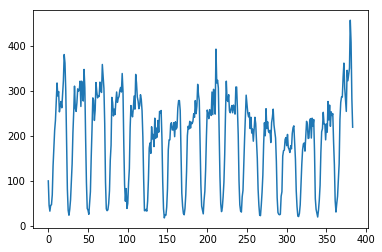

In [161]:
plt.plot(dayly)

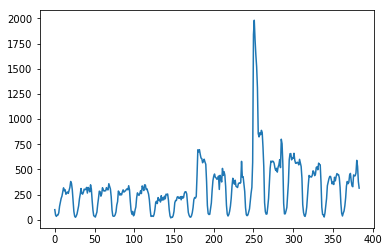

In [163]:
plt.plot(dayly_p)

Вау, это гораздо лучше подходит для нашей модели!

Подберем параметы и обучим ее.

In [150]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 2)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
#Examples of parameter combinations for Seasonal ARIMA...

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


In [164]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dayly, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:5208.177586116954
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:4515.272742556706
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:3675.982223506642
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:3435.0843109646376
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:3687.095105805467
ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:3677.991055592192
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:3444.552843282023
ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:3424.317678135568
ARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:4754.799784494412
ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:4184.1040301006105
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:3564.4279289133838
ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:3297.306021888446
ARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:3583.213383775274
ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:3572.720905483805
ARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:3327.2900564066877
ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:3298.6962945489095
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:3958.3620762131295
ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:3612.3835293618313
ARI

In [165]:
model=sm.tsa.statespace.SARIMAX(dayly, order=(1, 0, 1), seasonal_order=(0, 1, 1, 24), enforce_stationarity=False, enforce_invertibility=False).fit(disp=-1)

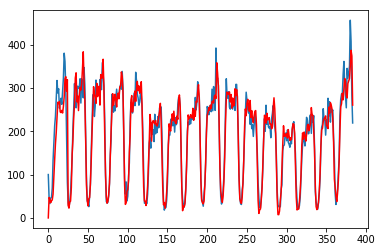

In [167]:
train_data = model.fittedvalues
pd.Series(dayly).plot()
pd.Series(train_data).plot(color='r')
plt.show()

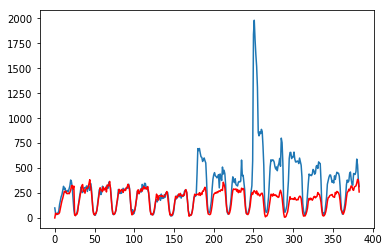

In [169]:
pd.Series(dayly_p).plot()
pd.Series(train_data).plot(color='r')
plt.show()

In [170]:
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9434      0.019     50.576      0.000       0.907       0.980
ma.L1         -0.4856      0.054     -8.950      0.000      -0.592      -0.379
ma.S.L24      -0.7952      0.051    -15.532      0.000      -0.896      -0.695
sigma2       625.4392     37.012     16.898      0.000     552.897     697.982


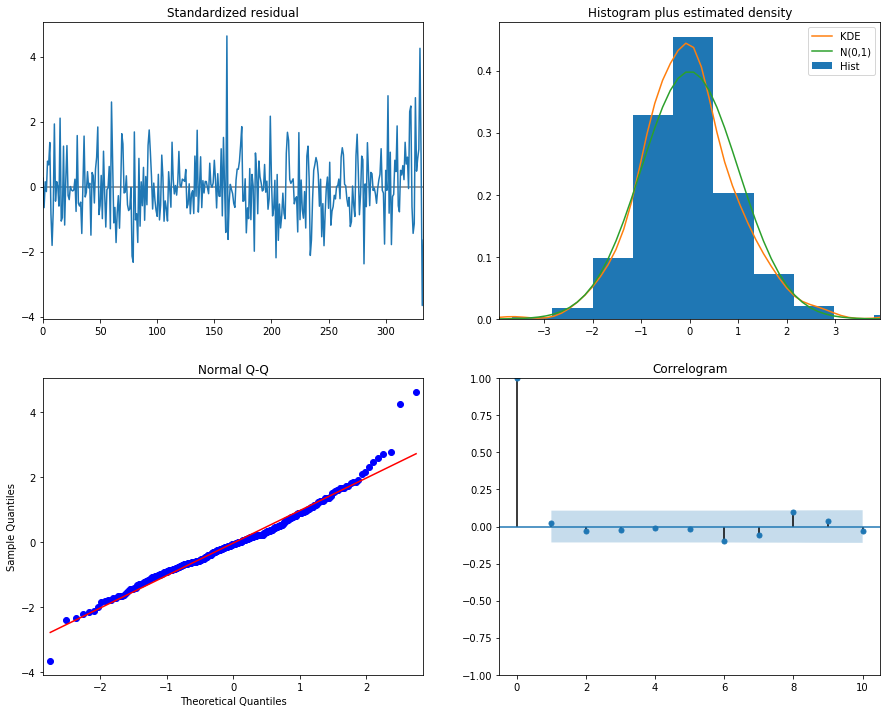

In [171]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

Как видно, модель по часам гораздо точнее. На практике именно ее стоит использовать.

## Соберем это в функцию, которая ищет аномалии

Для начала предложу функцию, который ищет аномалии по часам. Суть алгоритма так же, что и по по дням.

In [188]:
def find_anomal_hour(data, data_cl, k):
    dates = sorted(list(set(data_cl["date"].values)))
    dayly = get_hour_values(data_cl)
    dayly_p = get_hour_values(data)
    model=sm.tsa.statespace.SARIMAX(dayly, order=(1, 0, 1), seasonal_order=(0, 1, 1, 24), enforce_stationarity=False, enforce_invertibility=False).fit(disp=-1)
    mean = 0
    for hour in range(len(dayly)):
        mean += abs(dayly_p[hour] - model.predict()[hour])
    mean = mean / len(dayly)
    hours_problem = []
    for hour in range(len(dayly)):
        if dayly_p[hour] - model.predict()[hour] > mean + k:
            hours_problem.append(hour)
    return(list(map(lambda x: [x // 24, x % 24], hours_problem)))

## Пример

In [189]:
find_anomal_hour(data, data_cl, 500)

[[10, 10],
 [10, 11],
 [10, 12],
 [10, 13],
 [10, 14],
 [10, 15],
 [10, 18],
 [10, 20]]

## Подготовка данных для произвольного временного промежутка

In [27]:
def get_minute_values(data, delta):
    dates = sorted(list(set(data_cl["date"].values)))
    dayly = []
    for date in dates:
        test = data[data["date"] == date]
        test1 = data[data["date"] == date]
        test["time"] = list(map(lambda x: str(x.hour) + " " + str(x.minute), pd.to_datetime(test["time"], unit = "s")))
        for m in list(test.groupby(["time"]).count()["event"]):
            dayly.append(m)
        l = len(dayly)
        out = [sum(dayly[x: x + delta]) for x in range(0, l, delta)]
    return out

In [28]:
len(get_minute_values(data, 5))

4137

Это разбиение данных для произвольного временного промежутка (в минутах).

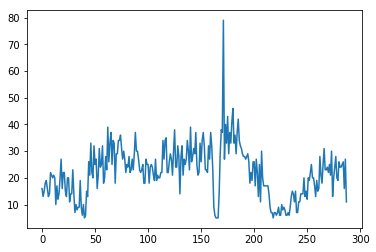

In [30]:
minutes = get_minute_values(data_cl, 5)[-12*24:]
plt.plot(minutes)

In [31]:
model_delta=sm.tsa.statespace.SARIMAX(minutes, order=(1, 0, 1), seasonal_order=(0, 1, 1, 24), enforce_stationarity=False, enforce_invertibility=False).fit(disp=-1)

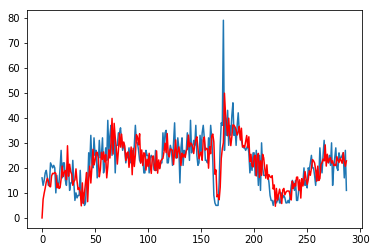

In [32]:
train_data = model_delta.fittedvalues
pd.Series(minutes).plot()
pd.Series(train_data).plot(color='r')
plt.show()

In [35]:
def get_k(test, pred):
    err = 0
    n = len(test)
    for i in range(n):
        err += abs(test[i] - pred[i])
    err = err / n
    return err

In [36]:
get_k(minutes, train_data)

5.353606006813268

In [39]:
def find_anomal_minute(data, data_cl, delta, k):
    dates = sorted(list(set(data_cl["date"].values)))
    delta_h = 60 // delta
    minute = get_minute_values(data_cl, delta)[-delta_h*24:]
    minute_p = get_minute_values(data, delta)[-delta_h*24:]
    model=sm.tsa.statespace.SARIMAX(minute, order=(1, 0, 1), seasonal_order=(0, 1, 1, 24), enforce_stationarity=False, enforce_invertibility=False).fit(disp=-1)
    mean = get_k(minute_p, model.fittedvalues)
    minutes_problem = []
    for minute in range(len(minute)):
        if minute_p[minute] - model.predict()[minute] > mean + k:
            minutes_problem.append(minute)
    return(list(map(lambda x: [x // 24*delta_h, x % (24*delta_h)], minutes_problem)))

In [41]:
find_anomal_minute(data, data_cl, 5, 5);

## Другие варианты построения детектора

Идея сравнения с прогнозными значениями временного ряда мне все еще нравится, однако, модель авторегрессии - достаточно старая штука и первое, что приходи в голову при прогнозе временных рядов. 

Если для минут и часов ARIMA подходит, то для дней явно нет.

Более новый метод заключается в использовании реккурентных нейронных сетей.

## RNN

In [42]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import tensorflow as tf

Using TensorFlow backend.


## Вернемся к данным по дням

In [55]:
d

OrderedDict([('2019-04-01', 5172),
             ('2019-04-02', 5269),
             ('2019-04-03', 5357),
             ('2019-04-04', 5108),
             ('2019-04-05', 5094),
             ('2019-04-06', 3955),
             ('2019-04-07', 4091),
             ('2019-04-08', 4524),
             ('2019-04-09', 5084),
             ('2019-04-10', 5107),
             ('2019-04-11', 4318),
             ('2019-04-12', 4042),
             ('2019-04-13', 3406),
             ('2019-04-14', 3743),
             ('2019-04-15', 4179),
             ('2019-04-16', 5909)])

In [72]:
dict_day = {"date": range(len(list(d.values()))), "val": list(d.values())}

In [73]:
df = pd.DataFrame.from_dict(dict_day)

In [74]:
df.head()

,date,val
0,0,5172
1,1,5269
2,2,5357
3,3,5108
4,4,5094


In [76]:
dataset = df.astype('float32')

In [78]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

In [79]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 11
test: 5


In [80]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [81]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

11 1
0
X 0 to 1
[0.]
Y 1
0.06666666666666667
1
X 1 to 2
[0.06666667]
Y 2
0.13333333333333333
2
X 2 to 3
[0.13333333]
Y 3
0.2
3
X 3 to 4
[0.2]
Y 4
0.26666666666666666
4
X 4 to 5
[0.26666667]
Y 5
0.3333333333333333
5
X 5 to 6
[0.33333333]
Y 6
0.4
6
X 6 to 7
[0.4]
Y 7
0.4666666666666667
7
X 7 to 8
[0.46666667]
Y 8
0.5333333333333333
8
X 8 to 9
[0.53333333]
Y 9
0.6
5 1
0
X 0 to 1
[0.73333333]
Y 1
0.8
1
X 1 to 2
[0.8]
Y 2
0.8666666666666667
2
X 2 to 3
[0.86666667]
Y 3
0.9333333333333333


In [82]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(9, 1, 1)
(3, 1, 1)


In [83]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
 - 1s - loss: 0.0745
Epoch 2/100
 - 0s - loss: 0.0397
Epoch 3/100
 - 0s - loss: 0.0291
Epoch 4/100
 - 0s - loss: 0.0273
Epoch 5/100
 - 0s - loss: 0.0250
Epoch 6/100
 - 0s - loss: 0.0263
Epoch 7/100
 - 0s - loss: 0.0262
Epoch 8/100
 - 0s - loss: 0.0260
Epoch 9/100
 - 0s - loss: 0.0249
Epoch 10/100
 - 0s - loss: 0.0258
Epoch 11/100
 - 0s - loss: 0.0255
Epoch 12/100
 - 0s - loss: 0.0252
Epoch 13/100
 - 0s - loss: 0.0231
Epoch 14/100
 - 0s - loss: 0.0252
Epoch 15/100
 - 0s - loss: 0.0247
Epoch 16/100
 - 0s - loss: 0.0249
Epoch 17/100
 - 0s - loss: 0.0238
Epoch 18/100
 - 0s - loss: 0.0230
Epoch 19/100
 - 0s - loss: 0.0243
Epoch 20/100
 - 0s - loss: 0.0221
Epoch 21/100
 - 0s - loss: 0.0242
Epoch 22/100
 - 0s - loss: 0.0237
Epoch 23/100
 - 0s - loss: 0.0220
Epoch 24/100
 - 0s - loss: 0.0239
Epoch 25/100
 - 0s - loss: 0.0222
Epoch 26/100
 - 0s - loss: 0.0233
Epoch 27/100
 - 0s - loss: 0.0212
Epoch 28/100
 - 0s - loss: 0.0233
Epoch 29/100
 - 0s - loss: 0.0224
Epoch 30/100
 - 0s - lo

In [109]:
trainPredict = model.predict(X_train, batch_size=batch_size)
testPredict = model.predict(X_test, batch_size=batch_size)

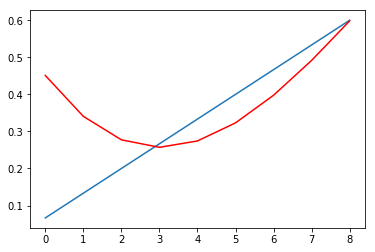

In [104]:
pd.Series(y_train).plot()
pd.Series(trainPredict.flatten()).plot(color='r')
plt.show()

## Заключение

В рамках данного алгоритма задача выглядит следующим образом: 

1) Преобразование данных во временной ряд для данного временного промежутка

2) Выбор метода прогнозирования ряда

3) Прогноз ряда, оценка ошибки

4) Оценка отклонения реальных исторических данных от прогоза во время всплеска, определение k

5) Сравнение текущих значений с прогнозными

6) Декодирование позиции во временном ряде в обычную дату

Во 2, 3 и 4 пункте достаточно много свободы. Выбор метода, функции ошибки, определение k. Однозначно сказать что именно стоит использовать можно только имея перед собой реальные данные и представляя, какие события хочет детектировать аналитик. 

Я предложил рабочий код, который умеет как находить аномалии в наборе данных, так и проверят новые поступающие данные на аномалии. 

В продолжении этой задачи вижу исследование исторических данных о всплесках для лучшего определения k, величины отклонения. А так же использование более совершенных моделей нейронных сетей.
